In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [33]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [63]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


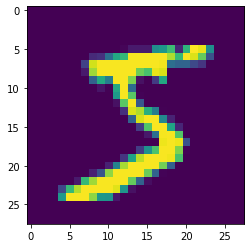

In [64]:
plt.imshow(x_train[0])

In [18]:
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

In [40]:
model=Sequential([
    Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(10,activation='sigmoid')
])

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
scaled_x_train=x_train / 255
scaled_x_test=x_test / 255

In [35]:
scaled_x_train=np.array(scaled_x_train)
scaled_x_test=np.array(scaled_x_test)

In [42]:
model.fit(scaled_x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 71s 37ms/step - loss: 0.1023 - accuracy: 0.9687
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0359 - accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 4/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0155 - accuracy: 0.9952
Epoch 5/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0100 - accuracy: 0.9967


In [43]:
y_predict=model.predict(scaled_x_test)

In [47]:
y_predict.shape

(10000, 10)

In [56]:
y_predict_max=np.argmax(y_predict,axis=1)

In [57]:
y_predict_max

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [44]:
from tensorflow.math import confusion_matrix

In [58]:
cm=confusion_matrix(y_test,y_predict_max)

In [59]:
import seaborn as sns

<AxesSubplot:>

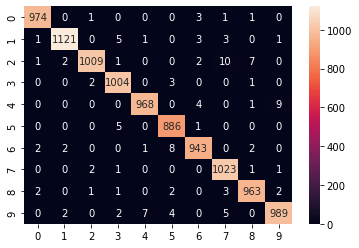

In [62]:
sns.heatmap(cm,annot=True,fmt='d')